https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

https://www.cs.toronto.edu/~kriz/cifar.html

# Object detection using CNN 

#### Problem Statement 
Indian government has decided to enhance the security in the border areas of China; hence we need to make a model that can detect an object by looking at the image captured by unmanned drone, you will be given a corpus of images that you will use to train the model Current project will include detection of the following 'airplane', 'automobile', 'bird', 'cat', 'deer’,’ dog', 'frog', 'horse', 'ship', 'truck’.

#### Expected Outcome
Create a model that can detect a given object The various objects are as follows 'airplane', 'automobile', 'bird', 'cat', 'deer’,’ dog', 'frog', 'horse', 'ship', 'truck’.


## Importing libraries and loading the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers ,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[0]

'airplane'

In [ ]:
def plot_sample (X,y,index):
  plt.figure(figsize = (20,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

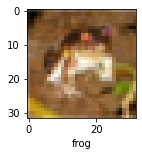

In [ ]:
plot_sample(X_train,y_train,0)

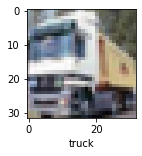

In [ ]:
plot_sample(X_train,y_train,1)


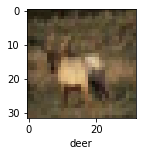

In [ ]:
plot_sample(X_train,y_train,3)

## Data Preprocessing

In [ ]:
# Data Normalization
X_train =X_train/255
X_test = X_test/255

## Training using simple ann

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10,activation = 'softmax')
])

ann.compile(optimizer = 'sgd',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8139 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6224 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5405 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4823 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4318 - accuracy: 0.4972


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4651 - accuracy: 0.4878


[1.4650973081588745, 0.4878000020980835]

accuracy on training sample = 49.58%

accuracy on test sample = 45.78%

In [ ]:
# Classification Report 
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred ]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.55      0.69      0.62      1000
           1       0.73      0.58      0.65      1000
           2       0.52      0.35      0.42      1000
           3       0.31      0.64      0.42      1000
           4       0.41      0.64      0.50      1000
           5       0.55      0.30      0.39      1000
           6       0.78      0.39      0.52      1000
           7       0.71      0.52      0.60      1000
           8       0.58      0.75      0.65      1000
           9       0.75      0.42      0.54      1000

    accuracy                           0.53     10000
   macro avg       0.59      0.53      0.53     10000
weighted avg       0.59      0.53      0.53     10000



## Training using CNN

In [ ]:
cnn = models.Sequential([
    #cnn layer 1
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPool2D((2,2)),
    #layer2
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPool2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation= 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [ ]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
cnn.summary()

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6552 - accuracy: 0.7696
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6303 - accuracy: 0.7763
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5947 - accuracy: 0.7918
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5718 - accuracy: 0.7985
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5463 - accuracy: 0.8059
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5210 - accuracy: 0.8149
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4979 - accuracy: 0.8240
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4777 - accuracy: 0.8314
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4584 - accuracy: 0.8374
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.433

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.9659 - accuracy: 0.6792


[0.9658666849136353, 0.6791999936103821]

## Transfer Learning 

In [ ]:
from tensorflow.keras.applications import VGG16
base_1 = VGG16(include_top= False,weights ='imagenet', input_shape=(32,32,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
base_1

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    base_1,
    layers.Flatten(),
    # YOUR CODE HERE. Attach a head of dense layers.
    layers.Dense(64,activation ='relu'),
    layers.Dense(10,activation ='relu'),
    layers.Dense(10,activation ='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                32832     
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
Total params: 14,748,280
Trainable params: 14,748,280
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 43s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: nan - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================] - 44s 28ms/step - loss: nan - accura

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## predictions

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.69816490e-04, 1.07119810e-02, 4.13882197e-04, 8.54557037e-01,
        3.39259888e-04, 3.27389352e-02, 9.18434486e-02, 1.46482648e-06,
        8.19298439e-03, 9.31134564e-04],
       [3.86742614e-02, 4.02788430e-01, 8.49983990e-05, 8.27822514e-05,
        3.79690726e-04, 4.73462569e-06, 9.90410190e-05, 2.11817883e-06,
        5.27635276e-01, 3.02487146e-02],
       [2.02123731e-01, 1.03906401e-01, 2.86190361e-02, 7.14543983e-02,
        4.28404398e-02, 6.66620862e-03, 6.69997185e-03, 1.53371869e-02,
        3.65071267e-01, 1.57281399e-01],
       [9.15820301e-01, 3.38913966e-03, 2.68942304e-03, 7.28342740e-04,
        5.13093174e-02, 7.85446828e-05, 3.44070053e-04, 5.79314597e-04,
        2.44907532e-02, 5.70712087e-04],
       [3.76762053e-08, 2.53961880e-05, 2.39381450e-03, 6.56529143e-03,
        1.39712632e-01, 3.29134928e-04, 8.50964069e-01, 8.33143804e-06,
        1.10100906e-07, 1.11079157e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

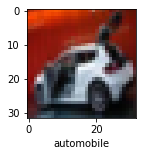

In [ ]:
plot_sample(X_test, y_test,6)